In [ ]:
from imports import *
from exactDiagMethods import build_exact_diag_hamiltonian, perform_exact_diag
from globalMethods import  build_initial_states, output_results, output_vqte_results
from vqteMethods import hamiltonian_generation, perform_vqte

In [ ]:

def main():
    # Initialize the simulation parameters
    N = 1
    gamma=0.05
    eps= 1
    mu_L=2
    mu_R=0.1
    T_L = 4
    T_R= 5
    beta_L=1/T_L
    beta_R=1/T_R
    F_L = 1/(np.exp(beta_L*(eps-mu_L))+1)
    F_R = 1/(np.exp(beta_R*(eps-mu_R))+1)
    J = 1

    time = 10.0
    dt = 0.1
    nt = int(time/dt)
    exact_diag_ham= build_exact_diag_hamiltonian(N,J, eps)


    ham_real, ham_imag = hamiltonian_generation(N, eps, gamma, F_L, F_R, J)
    print("Ham imag", ham_imag)
    print("Ham real", ham_real)

    vqte_init_state, exact_diag_init_state, ansatz, init_param_values = build_initial_states(ham_real,N)


    print("VQTE initial state", vqte_init_state)
    print("Exact initial state:",exact_diag_init_state)
    vqte_results = perform_vqte(ham_real, ham_imag, vqte_init_state, dt, nt, ansatz, init_param_values,N)
    output_vqte_results(vqte_results, time, nt)
    # # Perform exact diagonalization
    exact_diag_results, time_points = perform_exact_diag(gamma, F_L, F_R, dt, nt, exact_diag_init_state,exact_diag_ham,N,eps)
   
    # exact_diag_results = []
    # time_points = []
    # # Perform VQTE simulation

    # # Output results
    output_results(vqte_results, exact_diag_results, time, nt, time_points)

Ham imag SparsePauliOp(['XX', 'YY', 'II', 'ZI', 'IZ'],
              coeffs=[-0.025     +0.j,  0.025     +0.j,  0.05      +0.j, -0.01094559+0.j,
 -0.01362197+0.j])
Ham real SparsePauliOp(['ZI', 'IZ', 'XY', 'YX'],
              coeffs=[ 0.5       +0.j, -0.5       +0.j, -0.01729761+0.j, -0.01729761+0.j])
2
VQTE initial state Statevector([ 1.0000000e+00+4.89858720e-16j,
             -1.2246468e-16-2.99951957e-32j,
             -2.4492936e-16-2.99951957e-32j,
             -1.2246468e-16+2.99951957e-32j],
            dims=(2, 2))
Exact initial state: [[ 1.0000000e+00+4.89858720e-16j -2.4492936e-16-2.99951957e-32j]
 [-1.2246468e-16-2.99951957e-32j -1.2246468e-16+2.99951957e-32j]]
Initial expectation values:
  Qubit 0: 0.0000
Step 1 out of 100
Step 2 out of 100
Step 3 out of 100
Step 4 out of 100
Step 5 out of 100
Step 6 out of 100
Step 7 out of 100
Step 8 out of 100
Step 9 out of 100
Step 10 out of 100
Step 11 out of 100
Step 12 out of 100
Step 13 out of 100
Step 14 out of 100
Step 15 out of

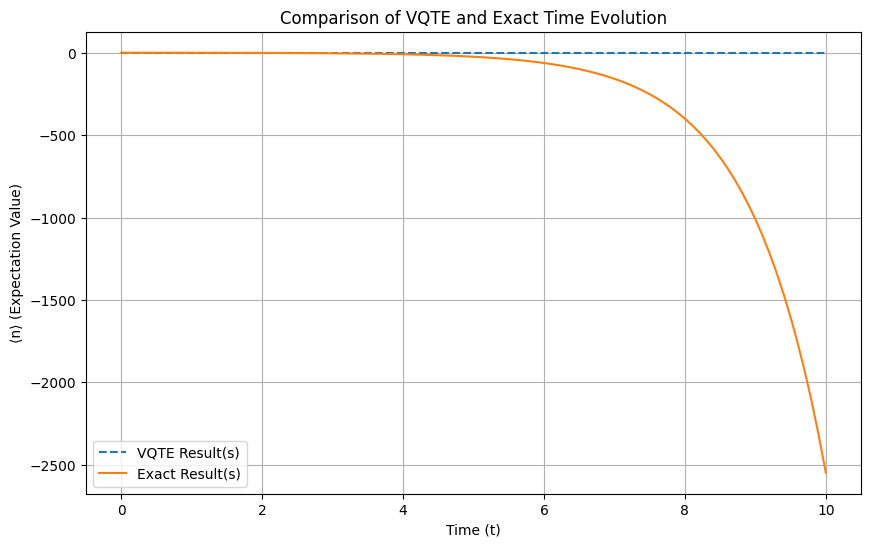

In [3]:
main()